# <span style="color:green">Evaluation Project - 2 

# <span style="color:red">Loan Application Status Prediction

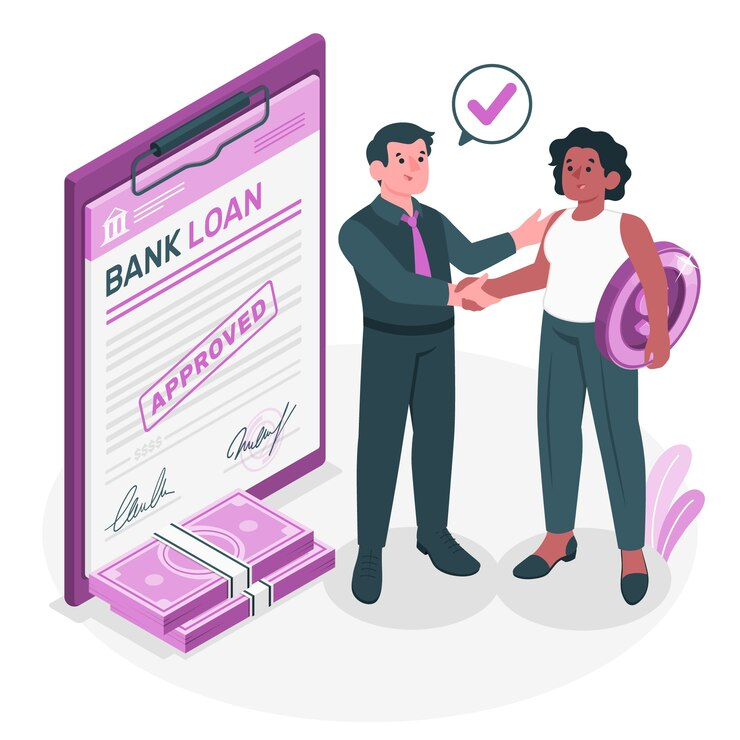

# Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset.                   

Dataset Link-  https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv


# <span style="color:RED">Documentation

<span style="color:green">Dataset Overview
    
 Name  - Loan Application Status Prediction             
 Format- CSV                   
 Size  - Rows-614 and Column-13

<span style="color:green">Variables

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

<span style="color:green">Data Cleaning and Preprocessing

Prior to analysis, the dataset underwent cleaning and preprocessing steps like:                
Handling missing values.                  
Checking numbers of unique values in each column.               
Checking Dublicate Values.               
Checking and Removing Skewness.             
Checking and Removing Outliers.             
Filling missing values by mode and median method.

<span style="color:green">Data Visualization      

Visualize Loan Status i.e Target variable       
Visualize Feature by Histplot        
Visualize Feature by Swarmplot       
Visualize Feature by Boxplot   

<span style="color:green">Training     

Training Data: Rows & Column (557, 9)                                  
Training Process: Feature Scaling Using Standard Scaler,Variance Threshold Method     
                  Multicollinearity.          
                  Feature Selection By SelectKBest method       
                  Train on different different model.        
                  Finding the Best Random State 

<span style="color:green">Evaluation 

Metrics: Use accuracy_score            
         Confusion_matrix.           
         Classification Report.           
        AUC ROC curve used to evaluate the performance of the model.  

<span style="color:green">Conclusion 

This case study dataset provides for predict the whether the loan of the applicant will be approved(Loan_status) or not ,which is categorical data.                        
It is clearly a Classification problem where "Loan_status" is target column and remaining columns are features.                  
RandomForestClassifier perform well with accuracy score 80% with less Type 1 and 2 Error and less Overfitted among all model.

# <span style="color:purple">Python Implementation

In [1]:
#Import Necessary Libraries

#Data Visualization
import pandas as pd
import numpy as np

#Data Visualization 
import seaborn as sns
import matplotlib.pyplot as plt

#Ignore Unnecessary warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing Dataset
df=pd.read_csv(r"D:\DATA SCIENCE\dataset for ML\loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# <span style="color:purple">Exploratory Data Analysis (EDA)

In [3]:
print(f'The Number of Rows and Columns in Dataset is :{df.shape}')
print( f'\n Columns Name are :{df.columns}')

The Number of Rows and Columns in Dataset is :(614, 13)

 Columns Name are :Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [4]:
#Getting Information Of Dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<span style="color:BLUE">Observation -
-There are three data types present in dataset:(object,float64,int64).             
-Some columns has null values.

In [5]:
# Dropping "Loan_ID" column as it doesn't give meaningful information
df.drop(["Loan_ID"], axis=1,inplace =True)
df.shape

(614, 12)

In [6]:
#Number of Null Values in each column
print(df.isna().sum())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [7]:
#Checking the ValueCount(i.e frequency of each value) of each Column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64


360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_A

<span style="color:BLUE">Observation -
 - No white space are present in dataset.   
 - 'Credit_History' has binary values(i.e 0 and 1),Hence considered as Categorical column.
   Lets convert the data type of 'Credit_History' to Object data type later.

In [8]:
#Checking numbers of unique values in each column
df.nunique().to_frame("No. of Unique Value")

,No. of Unique Value
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10
Credit_History,2


In [9]:
#Seperating Numerical and Categorical column

categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(f'Categorical columns are :{categorical_col} \n Number of Categorical column is {len(categorical_col)}')

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        numerical_col.append(i)
print(f'\n Numrical columns are :{numerical_col} \n Number of Numerical Columns is {len(numerical_col)}')

Categorical columns are :['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'] 
 Number of Categorical column is 7

 Numrical columns are :['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'] 
 Number of Numerical Columns is 5


In [10]:
#Lets Fill Null Value in Categorical Column by mode method
df[['Gender','Married','Dependents','Self_Employed']]=df[['Gender','Married','Dependents','Self_Employed']].fillna(df[['Gender','Married','Dependents','Self_Employed']].mode().iloc[0])

#Lets Fill Null Value in Numerical Column by mode and median method
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df[['Loan_Amount_Term','Credit_History']]=df[['Loan_Amount_Term','Credit_History']].fillna(df[['Loan_Amount_Term','Credit_History']].mode().iloc[0])

In [11]:
#Number of Null Values in each column
print(df.isna().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<span style="color:BLUE">Conclusion -Now there is no missing values. Lets go ahead.

In [12]:
#Converting Data type of 'Credit_History'
df['Credit_History'] = df['Credit_History'].astype(str)
print("Data Type Of Credit_History is :" ,df['Credit_History'].dtypes)

Data Type Of Credit_History is : object


In [13]:
#Checking Dublicate Values
print("Total Dublicate row are:", df.duplicated().sum())

Total Dublicate row are: 0


In [14]:
#Statical summary of numerical feature
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423
std,6109.041673,2926.248369,84.107233,64.428629
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,128.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


<span style="color:blue">Observation -From the above description , we can observe the following things:                 
    - Missing values are present in dataset.                      
    -The mean value is greater than median(50%) in "ApplicantIncome","CoapplicantIncome","LoanAmount",which means data is skewed right in these.                                    
    -The mean value is smaller than median(50%) in "Loan_Amount_Term" which means data is skewed left in these.   
    -There is difference in 75% and max value in few columns ,it means Outliers are present in the dataset. 
    
-We will see Skewness and Outliers again by visualization.

# <span style="color:purple">Data Visualization

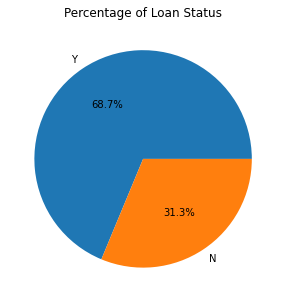

In [15]:
#Visualize Loan Status i.e Target variable
plt.figure(figsize = (10,5))
Ls= df["Loan_Status"].value_counts()
plt.pie(Ls.values, labels= Ls.index, data=df, autopct='%1.1f%%')
plt.title("Percentage of Loan Status")
plt.show()

<span style="color:BLUE">Observation -Number of Loan approved status is more than number of rejection.       
Hence they create Class Imbalance.We will balance the class later by SMOTE() method.

In [16]:
#Create a method to check for Data distribution,Relationship and Boxplot in numerical feature columns
def graph_plot(df,i):
    plt.figure(figsize = (20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,color='g')
    plt.xlabel (i, fontsize =15)
    plt.subplot(1,3,2)
    sns.swarmplot(y=i,x='Loan_Status',data=df,)
    plt.xlabel ('Loan_Status', fontsize =15)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.xlabel (i, fontsize =15)
    plt.show()

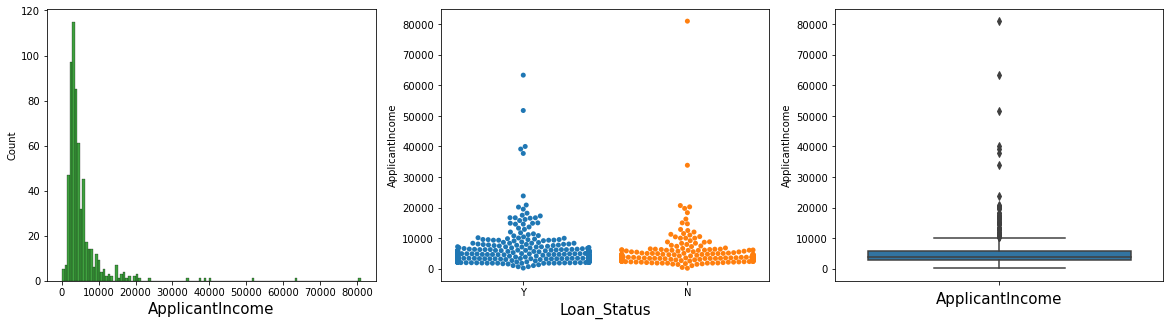

In [17]:
graph_plot(df,"ApplicantIncome")

<span style="color:BLUE">Observation -           
-Data Distribution is right skewed.          
-It seems that high salary applicants got loan approval.               
-There are number of Outliers present .

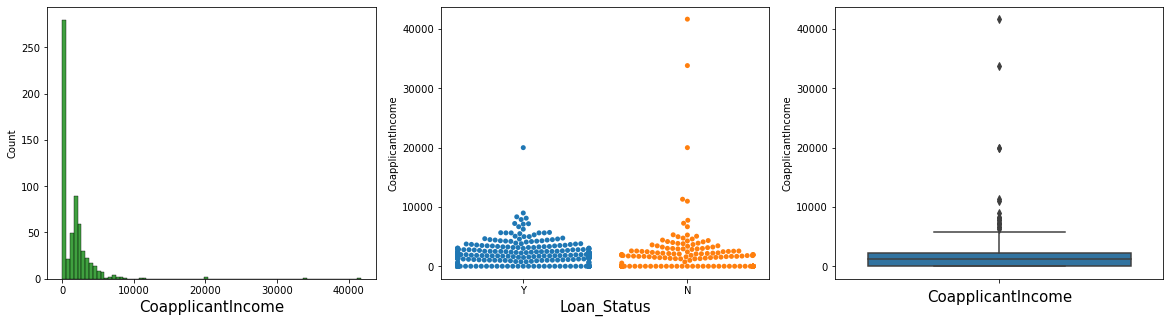

In [18]:
graph_plot(df,"CoapplicantIncome")

<span style="color:BLUE">Observation -           
-Data Distribution is right skewed.          
-It seems that high salary of CoapplicantIncome did't help to get loan approval.               
-There are some Outliers present .

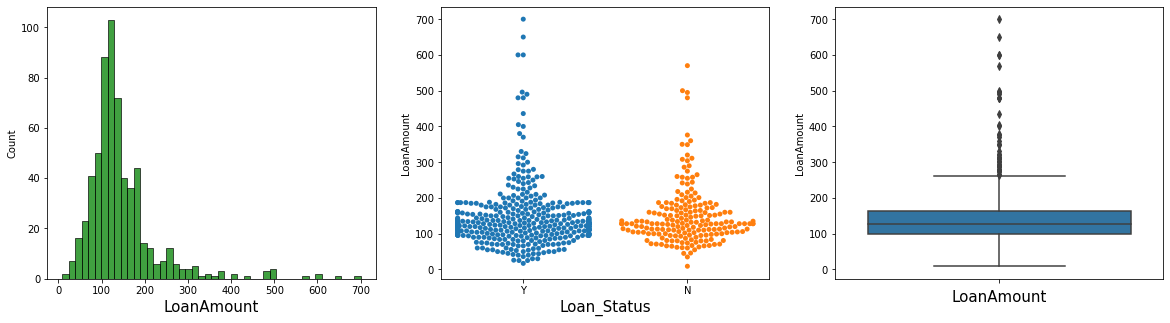

In [19]:
graph_plot(df,"LoanAmount")

<span style="color:BLUE">Observation -           
-Data Distribution is right skewed.          
-It seems that High Loan Amount helps to get loan approval.               
-There are some Outliers present .

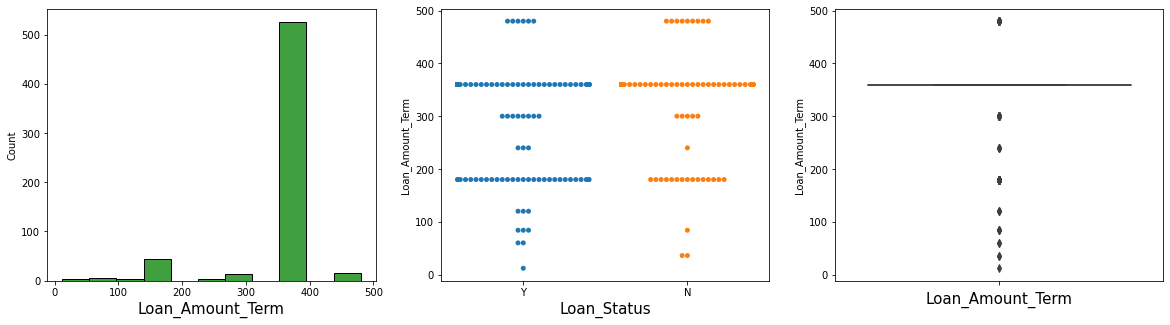

In [20]:
graph_plot(df,"Loan_Amount_Term")

<span style="color:BLUE">Observation -           
-More number of applicant has 360 as Loan_Amount_Term.          
-No such significant relation that helps to get loan approval.               
-There are few Outliers present.

In [21]:
#Create a method to check for Data distribution,Relationship in categorical feature columns
def graph_cat(df,i):
    cross=pd.crosstab(df[i],df.Loan_Status)
    cross.plot(kind='bar',rot=0)

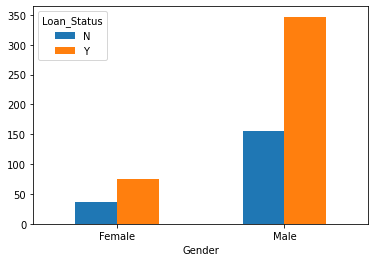

In [22]:
graph_cat(df,"Gender")

<span style="color:BLUE">Observation -           
-More number of Male applicants as compared to Female i.e approx(80%).          
-Percentage of Approved Male loan application was higher.              

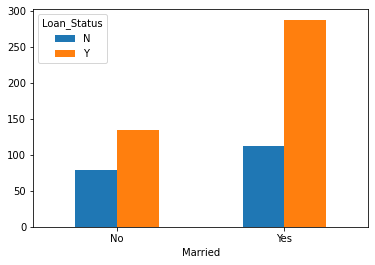

In [24]:
graph_cat(df,"Married")

<span style="color:BLUE">Observation -           
-More number of Married applicants as compared to Unmarried applicants present in dataset.          
-Percentage of Approved Married applicants was higher.   

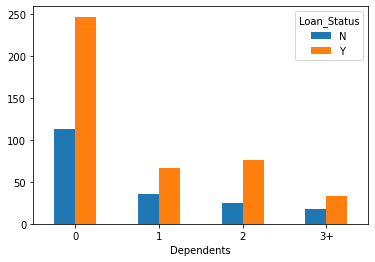

In [25]:
graph_cat(df,"Dependents")

<span style="color:BLUE">Observation -           
-More number of independent applicants as compared to others are present in dataset.          
-The proportion of 3+dependent applicants is higher for the approved loans

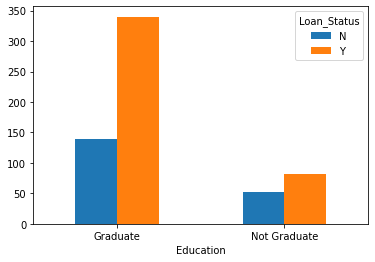

In [26]:
graph_cat(df,"Education")

<span style="color:BLUE">Observation -           
-Number of Graduate applicants are higher.          
-The proportion of Graduate applicants is higher for the approved loans

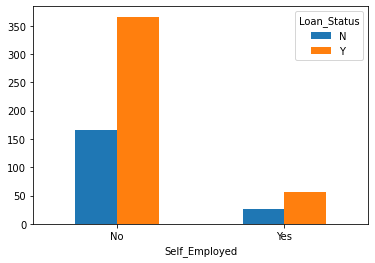

In [27]:
graph_cat(df,"Self_Employed")

<span style="color:BLUE">Observation -           
-Number of Self_Employed applicants are lower.          
-The proportion of Non Self_Employed applicants is higher for the approved loans.

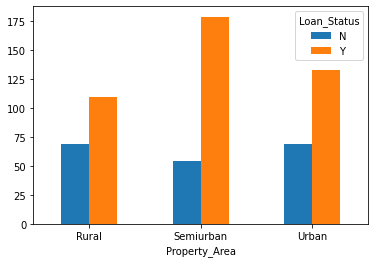

In [28]:
graph_cat(df,"Property_Area")

<span style="color:BLUE">Observation -           
-Number of applicants which has Semiurban Property area are higher.          
-The proportion of Semiurban Property area applicants is higher for the approved loans.

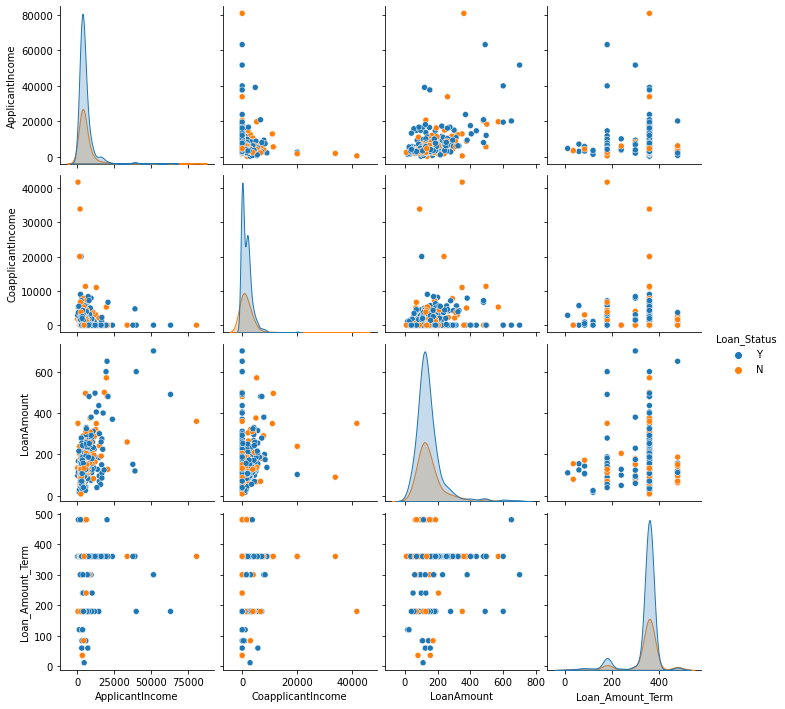

In [29]:
# Multivariate Analysis
sns.pairplot(df,hue='Loan_Status')
plt.show()

<span style="color:BLUE">Observation -           
-Data Distribution is mostly random.          
-It seems that no significant relation between numerical column.               

# <span style="color:purple">Removing Outliers
Numerical Features has Outliers. Lets remove Outliers by IQR method or Z-score

<span style="color:green">Remove Outliers by zscore

In [30]:
from scipy.stats import zscore
outliers_feature = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
z=np.abs(zscore(outliers_feature)) #.abs() to remove negative values

In [31]:
#Z-score>3
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([1, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2,
        2, 1, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2],
       dtype=int64))

In [32]:
#now removing the data above zscore and creating a new dataframe
df1=df[(z<3).all(axis=1)]
print("New Dataframe having rows and column: " ,df1.shape)
print("New Dataframe column's name: " ,df1.columns)

New Dataframe having rows and column:  (577, 12)
New Dataframe column's name:  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [33]:
print("Data Loss Percentage with Z-score method:",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage with Z-score method: 6.026058631921824


<span style="color:green">Remove Outliers by IQR

In [34]:
#1st Quantile
q1=outliers_feature.quantile(0.25)

#3rd Quantile
q3=outliers_feature.quantile(0.75)

#calculating IQR
iqr=q3-q1

df2=df[~((df < (q1 - 1.5*iqr ))|(df > (q3 + 1.5*iqr ))).any(axis=1)]

In [35]:
print("Data Loss Percentage with Z-score method:",((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data Loss Percentage with Z-score method: 25.2442996742671


<span style="color:blue">Conclusion -Data Loss Percentage  with IQR method is very high as compared with Z-score . So i go with z-score.

In [36]:
#Storing Dataframe with Z-score method in old dataframe
df=df1

In [37]:
#reset the index after removing outliers values
df.reset_index( drop=True, inplace=True)
df.shape

(577, 12)

# <span style="color:purple">Removing Skewness 

In [39]:
# Checking Skewness
df.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

<span style="color:blue">Observation- We have skewness in all numerical column.
 Lets remove it except "Credit_History"(Since it is a Categorical column).

In [40]:
#Removing Skewness using cuberoot
df['ApplicantIncome']=np.cbrt(df['ApplicantIncome'])
df['CoapplicantIncome']=np.cbrt(df['CoapplicantIncome'])
df['LoanAmount']=np.cbrt(df['LoanAmount'])
df['Loan_Amount_Term']=np.cbrt(df['Loan_Amount_Term'])
# Checking Skewness again
df.skew()

ApplicantIncome      0.845845
CoapplicantIncome   -0.038951
LoanAmount           0.054080
Loan_Amount_Term    -2.572549
Credit_History      -1.976043
dtype: float64

In [41]:
df['ApplicantIncome']=np.sqrt(df['ApplicantIncome'])
# Checking Skewness again
df.skew()

ApplicantIncome      0.402441
CoapplicantIncome   -0.038951
LoanAmount           0.054080
Loan_Amount_Term    -2.572549
Credit_History      -1.976043
dtype: float64

<span style="color:BLUE">Observation -Hence we removed skewness. Let's go with this value.

In [42]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,4.244699,0.000000,5.039684,7.113787,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4.075601,11.467457,5.039684,7.113787,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3.797696,0.000000,4.041240,7.113787,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,3.704140,13.310098,4.932424,7.113787,1.0,Urban,Y
4,Male,No,0,Graduate,No,4.262770,0.000000,5.204828,7.113787,1.0,Urban,Y


# <span style="color:purple">Encoding Categorical Column

In [43]:
#Encoding "Loan_Status" Column using labelEncoder
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["Loan_Status"]=LE.fit_transform(df["Loan_Status"])
        
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,4.244699,0.000000,5.039684,7.113787,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4.075601,11.467457,5.039684,7.113787,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3.797696,0.000000,4.041240,7.113787,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,3.704140,13.310098,4.932424,7.113787,1.0,Urban,1
4,Male,No,0,Graduate,No,4.262770,0.000000,5.204828,7.113787,1.0,Urban,1


In [44]:
#Encoding Categorical Column using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE= OrdinalEncoder()
df["Gender"]=OE.fit_transform(df["Gender"].values.reshape(-1,1))
df["Married"]=OE.fit_transform(df["Married"].values.reshape(-1,1))
df["Dependents"]=OE.fit_transform(df["Dependents"].values.reshape(-1,1))
df["Education"]=OE.fit_transform(df["Education"].values.reshape(-1,1))
df["Self_Employed"]=OE.fit_transform(df["Self_Employed"].values.reshape(-1,1))
df["Property_Area"]=OE.fit_transform(df["Property_Area"].values.reshape(-1,1))

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,4.244699,0.000000,5.039684,7.113787,1.0,2.0,1
1,1.0,1.0,1.0,0.0,0.0,4.075601,11.467457,5.039684,7.113787,1.0,0.0,0
2,1.0,1.0,0.0,0.0,1.0,3.797696,0.000000,4.041240,7.113787,1.0,2.0,1
3,1.0,1.0,0.0,1.0,0.0,3.704140,13.310098,4.932424,7.113787,1.0,2.0,1
4,1.0,0.0,0.0,0.0,0.0,4.262770,0.000000,5.204828,7.113787,1.0,2.0,1


<span style="color:BLUE">Observation -Hence we encoded categorical column sucessfully. Let's go with this value.

# <span style="color:purple">Checking Correlation

<AxesSubplot:>

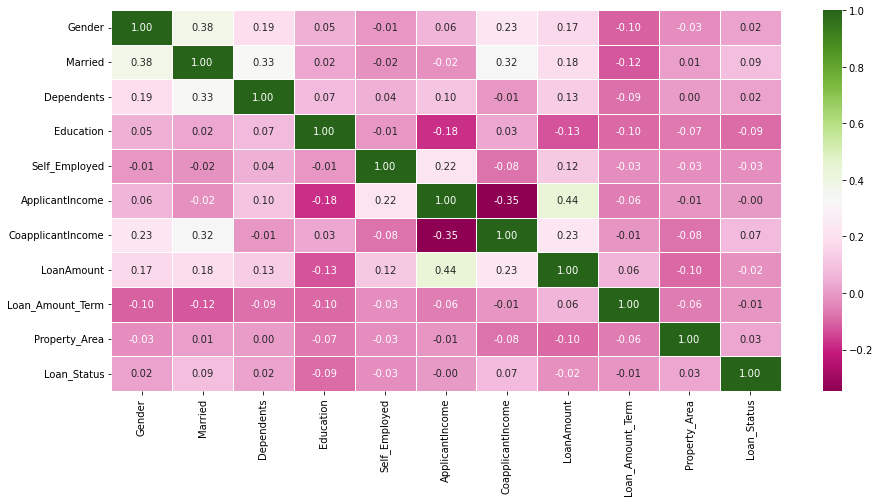

In [46]:
#checking the corelation  again using heatmaps (only absolute values)
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), annot = True, linewidths=0.5, fmt='.2f',cmap="PiYG")

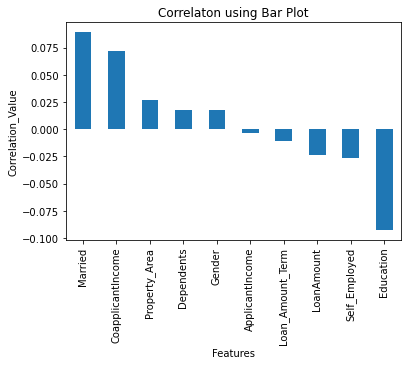

In [47]:
#Visualizing Correlaton using Bar Plot
df_corr = df.corr()
df_corr['Loan_Status'].sort_values(ascending=False).drop('Loan_Status').plot.bar()
plt.xlabel('Features')
plt.ylabel('Correlation_Value')
plt.title('Correlaton using Bar Plot')
plt.show()

<span style="color:BLUE">Observation - 
-Column Education,SElf_Employed,LoanAmount,Loan_Amount_Term are negatively correlated with target variable.         
-Columns like  Gender , Married, Dependents, CoapplicantIncome and Property_Area are positive correlated with target variable.  
-ApplicantIncome has no correation with target variable.              
-Here no two features are strongly correlated.Hence no multicollinearity exists. But we can analyse again by VIF method later.

# <span style="color:purple">Seperating Feature and Label

In [48]:
#Seperating Feature and label into x and y
x=df.drop(["Loan_Status"],axis=1)
y=df["Loan_Status"]

print("Feature Dimension :" ,x.shape)
print("Target Dimension :" ,y.shape)

Feature Dimension : (577, 11)
Target Dimension : (577,)


# <span style="color:purple">Feature Scaling Using Standard Scaler

In [49]:
# data scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,0.0,0.0,4.244699,0.000000,5.039684,7.113787,1.0,2.0
1,1.0,1.0,1.0,0.0,0.0,4.075601,11.467457,5.039684,7.113787,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3.797696,0.000000,4.041240,7.113787,1.0,2.0
3,1.0,1.0,0.0,1.0,0.0,3.704140,13.310098,4.932424,7.113787,1.0,2.0
4,1.0,0.0,0.0,0.0,0.0,4.262770,0.000000,5.204828,7.113787,1.0,2.0


# <span style="color:purple">Detecting Multicollinearity Using a Variance Inflation Factor (VIF)

In [50]:
#finding VIF in each scaled column i.e x_scaled.shape[1](1/1- R^2 )
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame() 

vif["VIF"] = [variance_inflation_factor(x_scaled.values, i) for i in range(len(x_scaled.columns))]
vif["Features"] = x_scaled.columns
vif

,VIF,Features
0,1.221100,Gender
1,1.401585,Married
2,1.171712,Dependents
3,1.072338,Education
4,1.055657,Self_Employed
5,1.795544,ApplicantIncome
6,1.608101,CoapplicantIncome
7,1.619363,LoanAmount
8,1.059529,Loan_Amount_Term
9,1.010105,Credit_History


<span style="color:blue">Observation - THe VIF value is below 10 in all feature ,Hence no multicollinearity observed. 
Lets go ahead.

# <span style="color:purple">Feature Selection By Variance Threshold Method

It removes all features which variance doesn't meet some threshold. By default, it removes all zero-variance features

In [51]:
from sklearn.feature_selection import VarianceThreshold
var_threshold=VarianceThreshold(threshold=0)
var_threshold.fit(x_scaled)

VarianceThreshold(threshold=0)

In [52]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [53]:
x_scaled.columns[var_threshold.get_support()]

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [54]:
# taking  out  all the  constant  columns 
consant_columns = [column for column in x.columns
               if column not in x.columns[var_threshold.get_support()]]
print(len(consant_columns))

0


<span style="color:blue">Obsevation- We can see that No columnn are constant column .Lets check again by KBest method.

# <span style="color:purple">Feature Selection By SelectKBest method

In [55]:
from sklearn.feature_selection import SelectKBest, f_classif

#Create SelectKBest with  f_classif 
best_fit = SelectKBest(score_func = f_classif, k =11)

#Fit the model
fit = best_fit.fit(x_scaled,y)

#Create DataFrame for score and column 
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x_scaled.columns)

#Concatenate the score and column
featureScores = pd.concat([df_columns,df_scores],axis = 1)
featureScores.columns = ['Feature', 'Score']

#print the top 11 feature based on score
print(featureScores.nlargest(11,'Score'))

              Feature       Score
9      Credit_History  263.985861
3           Education    4.979459
1             Married    4.593676
6   CoapplicantIncome    2.988601
4       Self_Employed    0.404840
10      Property_Area    0.404285
7          LoanAmount    0.320338
2          Dependents    0.183728
0              Gender    0.174308
8    Loan_Amount_Term    0.063301
5     ApplicantIncome    0.007467


<span style="color:blue">Obsevation- Selecting the best features based on above scores, we can see that the column "ApplicantIncome", 'Loan_Amount_Term'
has most lowest features for the prediction, so we will drop these column.

In [56]:
#Droping "ApplicantIncome",'Loan_Amount_Term' column 
x_scaled=x_scaled.drop(["ApplicantIncome",'Loan_Amount_Term'],axis =1)
x_scaled.shape

(577, 9)

# <span style="color:purple">Data Balance by Oversampling

In [57]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x_scaled,y)

y1.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

<span style="color:blue">Conclusion -Hence Data is balanced .

# <span style="color:Purple">Split the data into training and testing sets

In [58]:
# Split the data into training and testing sets 
from sklearn.model_selection import train_test_split
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split (x1, y1, test_size = .30, random_state = i)


print("Total Size Of Feature in Dataset :",x1.shape)
print("Total Size Of Training Feature Dataset : " ,x_train.shape)
print("Total Size Of Testing Feature Dataset : ", x_test.shape)

print("Total Size Of Label in Dataset :",y1.shape)
print("Total Size Of Training Label Dataset : " ,y_train.shape)
print("Total Size Of Testing Label Dataset : ", y_test.shape)

Total Size Of Feature in Dataset : (796, 9)
Total Size Of Training Feature Dataset :  (557, 9)
Total Size Of Testing Feature Dataset :  (239, 9)
Total Size Of Label in Dataset : (796,)
Total Size Of Training Label Dataset :  (557,)
Total Size Of Testing Label Dataset :  (239,)


# <span style="color:purple">Create one function and call as many as times to check accuracy and overfitting of different model

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def classification_model(model_name,x_train,x_test,y_train,y_test, train=True):
    if train: #checking training accuracy
        y_pred_train=model_name.predict(x_train)
        
        print("\n*********************Train Result*********************")
        
        print("Accuracy on train data:", accuracy_score(y_train, y_pred_train))
        
    elif train==False: #checking testing accuracy
        y_pred = model_name.predict(x_test)
        
        print("\n*********************Test Result*********************")
        
        print("Accuracy on test data:", accuracy_score(y_test, y_pred))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print("Classification Report:\n", classification_report(y_test, y_pred)) 
        
        print("\n*********************Cross-Validation score*********************")
        print("Overall Cross-Validation score :",cross_val_score(model_name,x1,y1,cv=5).mean())
        
        print("\n************Difference in CV score and Accuracy score***********")
        deviation= ((accuracy_score(y_test, y_pred))-(cross_val_score(model_name,x1,y1,cv=5).mean()))
        print("Difference",deviation)
        

# <span style="color:green">MODELS

# <span style="color:purple">LogisticRegression

In [62]:
from sklearn.linear_model import LogisticRegression
# Create a logistic regression model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

#Call the function and pass datset to check train and test score 
classification_model(logreg,x_train,x_test,y_train,y_test, train=True) #This is training score
classification_model(logreg,x_train,x_test,y_train,y_test, train=False) #This is testing score


*********************Train Result*********************
Accuracy on train data: 0.7378815080789947

*********************Test Result*********************
Accuracy on test data: 0.6736401673640168
Confusion Matrix:
 [[ 55  64]
 [ 14 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.46      0.59       119
           1       0.62      0.88      0.73       120

    accuracy                           0.67       239
   macro avg       0.71      0.67      0.66       239
weighted avg       0.71      0.67      0.66       239


*********************Cross-Validation score*********************
Overall Cross-Validation score : 0.7161006289308176

************Difference in CV score and Accuracy score***********
Difference -0.04246046156680083


# <span style="color:purple">KNeighborsClassifier

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(x_train, y_train)

#Call the function and pass datset to check train and test score 
classification_model(knn,x_train,x_test,y_train,y_test, train=True) #This is training score
classification_model(knn,x_train,x_test,y_train,y_test, train=False) #This is testing score


*********************Train Result*********************
Accuracy on train data: 0.8438061041292639

*********************Test Result*********************
Accuracy on test data: 0.6903765690376569
Confusion Matrix:
 [[73 46]
 [28 92]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.61      0.66       119
           1       0.67      0.77      0.71       120

    accuracy                           0.69       239
   macro avg       0.69      0.69      0.69       239
weighted avg       0.69      0.69      0.69       239


*********************Cross-Validation score*********************
Overall Cross-Validation score : 0.7450471698113208

************Difference in CV score and Accuracy score***********
Difference -0.054670600773663924


# <span style="color:purple">DecisionTreeClassifier

In [64]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

#Call the function and pass datset to check train and test score 
classification_model(dtc,x_train,x_test,y_train,y_test, train=True) #This is training score
classification_model(dtc,x_train,x_test,y_train,y_test, train=False) #This is testing score


*********************Train Result*********************
Accuracy on train data: 0.9964093357271095

*********************Test Result*********************
Accuracy on test data: 0.7531380753138075
Confusion Matrix:
 [[88 31]
 [28 92]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75       119
           1       0.75      0.77      0.76       120

    accuracy                           0.75       239
   macro avg       0.75      0.75      0.75       239
weighted avg       0.75      0.75      0.75       239


*********************Cross-Validation score*********************
Overall Cross-Validation score : 0.7475864779874213

************Difference in CV score and Accuracy score***********
Difference -0.0032534341201546635


# <span style="color:purple">SVC

In [65]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

#Call the function and pass datset to check train and test score 
classification_model(svc,x_train,x_test,y_train,y_test, train=True) #This is training score
classification_model(svc,x_train,x_test,y_train,y_test, train=False) #This is testing score


*********************Train Result*********************
Accuracy on train data: 0.77737881508079

*********************Test Result*********************
Accuracy on test data: 0.702928870292887
Confusion Matrix:
 [[ 59  60]
 [ 11 109]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.50      0.62       119
           1       0.64      0.91      0.75       120

    accuracy                           0.70       239
   macro avg       0.74      0.70      0.69       239
weighted avg       0.74      0.70      0.69       239


*********************Cross-Validation score*********************
Overall Cross-Validation score : 0.7374921383647799

************Difference in CV score and Accuracy score***********
Difference -0.034563268071892916


# <span style="color:purple">AdaBoostClassifier

In [66]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
#Call the function and pass datset to check train and test score 
classification_model(ada,x_train,x_test,y_train,y_test, train=True) #This is training score
classification_model(ada,x_train,x_test,y_train,y_test, train=False) #This is testing score


*********************Train Result*********************
Accuracy on train data: 0.8186714542190305

*********************Test Result*********************
Accuracy on test data: 0.7489539748953975
Confusion Matrix:
 [[ 75  44]
 [ 16 104]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.63      0.71       119
           1       0.70      0.87      0.78       120

    accuracy                           0.75       239
   macro avg       0.76      0.75      0.75       239
weighted avg       0.76      0.75      0.75       239


*********************Cross-Validation score*********************
Overall Cross-Validation score : 0.7525786163522012

************Difference in CV score and Accuracy score***********
Difference -0.0036246414568037455


# <span style="color:purple">RandomForestClassifier

In [67]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
#Call the function and pass datset to check train and test score 
classification_model(RFC,x_train,x_test,y_train,y_test, train=True) #This is training score
classification_model(RFC,x_train,x_test,y_train,y_test, train=False) #This is testing score


*********************Train Result*********************
Accuracy on train data: 0.9964093357271095

*********************Test Result*********************
Accuracy on test data: 0.7907949790794979
Confusion Matrix:
 [[ 85  34]
 [ 16 104]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.71      0.77       119
           1       0.75      0.87      0.81       120

    accuracy                           0.79       239
   macro avg       0.80      0.79      0.79       239
weighted avg       0.80      0.79      0.79       239


*********************Cross-Validation score*********************
Overall Cross-Validation score : 0.8192138364779874

************Difference in CV score and Accuracy score***********
Difference -0.024645272492829218


# <span style="color:purple">GradientBoostingClassifier 

In [68]:
from sklearn.ensemble import GradientBoostingClassifier 
gbr = GradientBoostingClassifier()
gbr.fit(x_train, y_train)

#Call the function and pass datset to check train and test score 
classification_model(gbr,x_train,x_test,y_train,y_test, train=True) #This is training score
classification_model(gbr,x_train,x_test,y_train,y_test, train=False) #This is testing score


*********************Train Result*********************
Accuracy on train data: 0.9192100538599641

*********************Test Result*********************
Accuracy on test data: 0.7615062761506276
Confusion Matrix:
 [[ 76  43]
 [ 14 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.64      0.73       119
           1       0.71      0.88      0.79       120

    accuracy                           0.76       239
   macro avg       0.78      0.76      0.76       239
weighted avg       0.78      0.76      0.76       239


*********************Cross-Validation score*********************
Overall Cross-Validation score : 0.7928223270440252

************Difference in CV score and Accuracy score***********
Difference -0.03131605089339762


<span style="color:red">Out of all my Classification model ,RandomForestClassifier model perform good with minimum Type1 and Type 2 Error for this dataset.             
Let's try to increase its acuuracy by HyperParameter Tuning

# <span style="color:purple">HyperParameter Tuning for RandomForestClassifier model

In [69]:
from sklearn.model_selection import  GridSearchCV

RFC.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [70]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [71]:
grid_randomfor = GridSearchCV(RandomForestClassifier(), param_grid=param_grid,cv= 5)
grid_randomfor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [72]:
grid_randomfor.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

In [75]:
rfc = RandomForestClassifier(n_estimators= 100, min_samples_leaf= 1,min_samples_split=2)
rfc.fit(x_train, y_train)
# Predict the target variable for the test data
y_pred = rfc.predict(x_test) 

# Evaluate the model's performance
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on test data: 0.7949790794979079
Confusion Matrix:
 [[ 85  34]
 [ 15 105]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.71      0.78       119
           1       0.76      0.88      0.81       120

    accuracy                           0.79       239
   macro avg       0.80      0.79      0.79       239
weighted avg       0.80      0.79      0.79       239



<span style="color:red"> After HyperParameter Tuning there is a minimal increament in accuarcy of RandomForestClassifier model.

# <span style="color:purple">AUC- ROC Curve

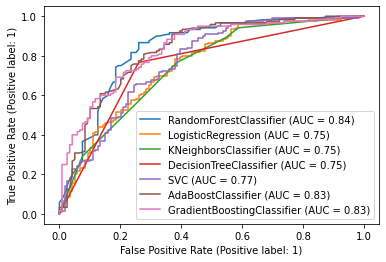

In [76]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

#For Tetsing Data
disp = plot_roc_curve (RFC, x_test, y_test)
plot_roc_curve (logreg, x_test, y_test, ax = disp.ax_)
plot_roc_curve (knn, x_test, y_test, ax = disp.ax_)
plot_roc_curve (dtc, x_test, y_test, ax = disp.ax_)
plot_roc_curve (svc, x_test, y_test, ax = disp.ax_)
plot_roc_curve (ada, x_test, y_test, ax = disp.ax_)
plot_roc_curve (gbr, x_test, y_test, ax = disp.ax_)

plt.legend (prop = {'size' : 10}, loc = 'lower right')
plt.show()

<span style="color:red">In AUC-ROC Curve RandomForestClassifier model has highest area.

In [77]:
#saving Model
import joblib
joblib.dump(rfc,'Loan Application Status Prediction')

['Loan Application Status Prediction']

In [78]:
#Model Prediction
rfc_model = joblib.load('Loan Application Status Prediction')
loan = rfc_model.predict(x_test)
loan

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1])

# <span style="color:purple">Comparing predicted value with orignal value

In [80]:
test_data = np.array(y_test)
loan_pred = pd.DataFrame({'predicted': loan,'original':test_data})
loan_pred

,predicted,original
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
234,1,1
235,1,0
236,0,0
237,0,1


# <span style="color:green">Predicted value and  Orignal value are almost same.

# End